In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import itertools
import catboost

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score, GridSearchCV)

from sklearn.preprocessing import (
    scale, LabelEncoder, StandardScaler,
    MinMaxScaler, Normalizer, RobustScaler
)

from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, confusion_matrix, recall_score,
    roc_auc_score, roc_curve
)

# to display all columns and rows:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# The number of numbers that will be shown after the comma.
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Dataset

`ID`: Unique ID

`Gender`: Gender of the customer

`Ever_Married`: Marital status of the customer

 `Age`: Age of the customer

`Graduated`: Is the customer a graduate?

`Profession`: Profession of the customer

`Work_Experience`: Work Experience in years

`Spending_Score`: Spending score of the customer

`Family_Size`: Number of family members for the customer (including the customer)

`Var_1`: Anonymised Category for the customer

`Segmentation` : (target)

In [8]:
# Dataset
data = pd.read_csv("Train.csv")
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0000,Low,4.0000,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0000,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0000,Low,1.0000,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0000,High,2.0000,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0000,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0000,Average,2.0000,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0000,Low,3.0000,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0000,Low,3.0000,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0000,Low,3.0000,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0000,Average,4.0000,Cat_6,C


In [9]:
data.shape

(8068, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [11]:
for col in data.drop(['ID', 'Age', 'Work_Experience'], axis = 1).columns:
    print(data[col].value_counts())

Gender
Male      4417
Female    3651
Name: count, dtype: int64
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64
Graduated
Yes    4968
No     3022
Name: count, dtype: int64
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64
Family_Size
2.0000    2390
3.0000    1497
1.0000    1453
4.0000    1379
5.0000     612
6.0000     212
7.0000      96
8.0000      50
9.0000      44
Name: count, dtype: int64
Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64


In [12]:
# Number of duplicate data
data.duplicated().sum()

0

> Tidak ada data yang duplikat

# Exploratory Data Analysis

In [13]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.0000,8068.0000,7239.0000,7733.0000
mean,463479.2146,43.4669,2.6417,2.8501
std,2595.3812,16.7117,3.4068,1.5314
min,458982.0000,18.0000,0.0000,1.0000
25%,461240.7500,30.0000,0.0000,2.0000
50%,463472.5000,40.0000,1.0000,3.0000
75%,465744.2500,53.0000,4.0000,4.0000
max,467974.0000,89.0000,14.0000,9.0000


In [14]:
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'categorical':
        print(f'Value of counts of {col}:')
        print(data[col].value_counts())
        print()

Value of counts of Gender:
Gender
Male      4417
Female    3651
Name: count, dtype: int64

Value of counts of Ever_Married:
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

Value of counts of Graduated:
Graduated
Yes    4968
No     3022
Name: count, dtype: int64

Value of counts of Profession:
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

Value of counts of Spending_Score:
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64

Value of counts of Var_1:
Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

Value of counts of Segmentation:
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64



## Categorical Columns

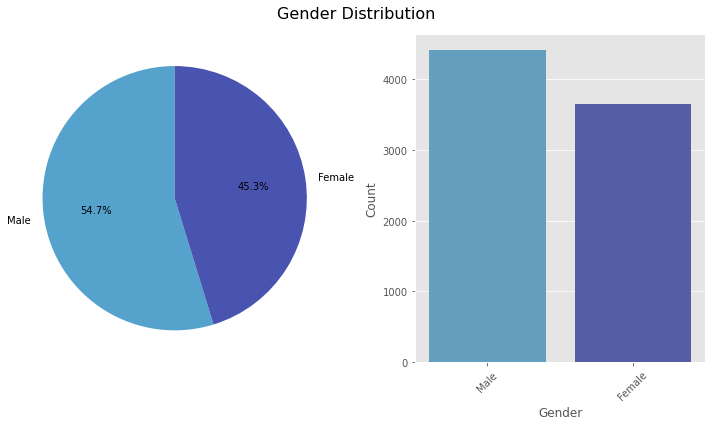

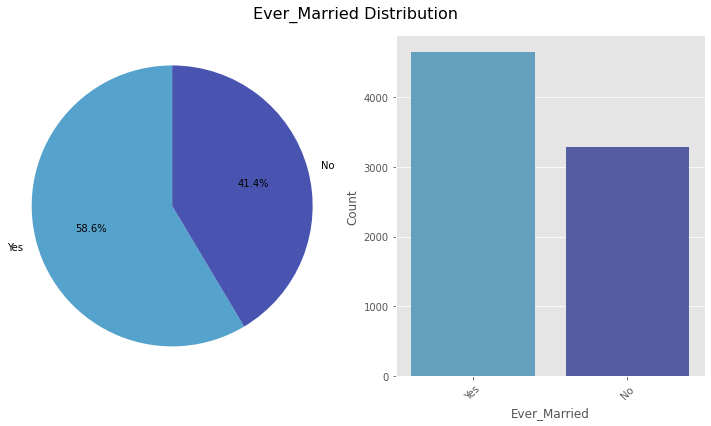

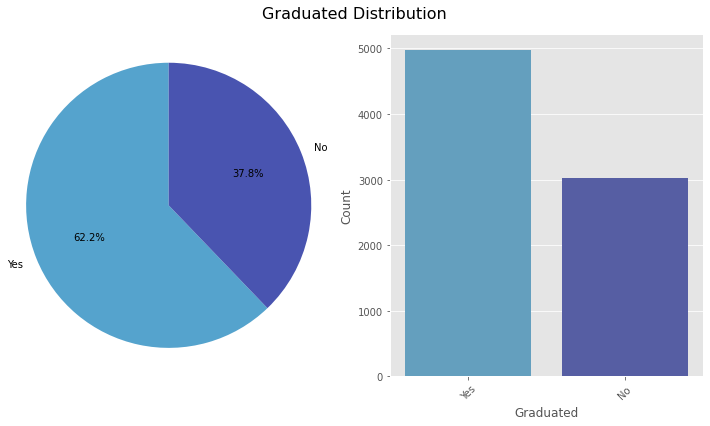

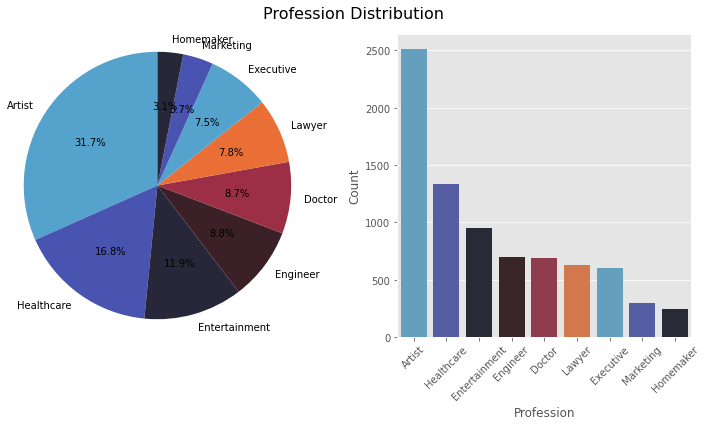

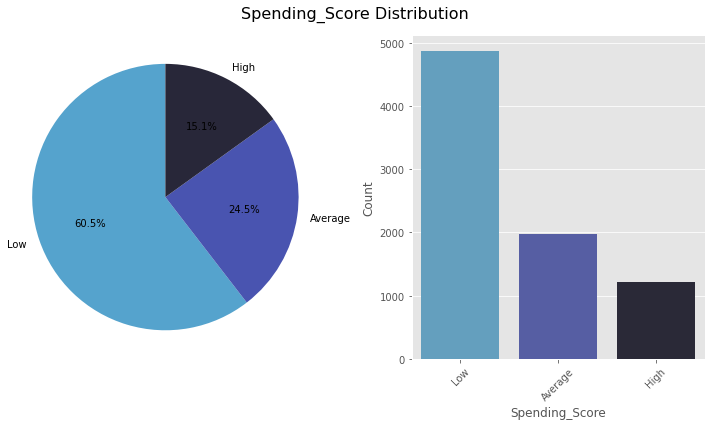

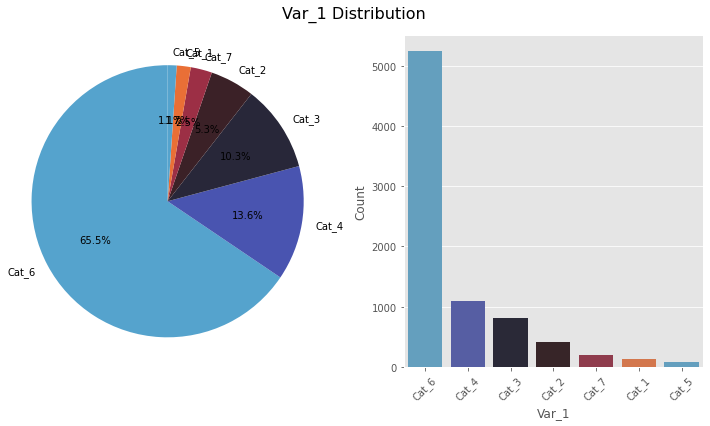

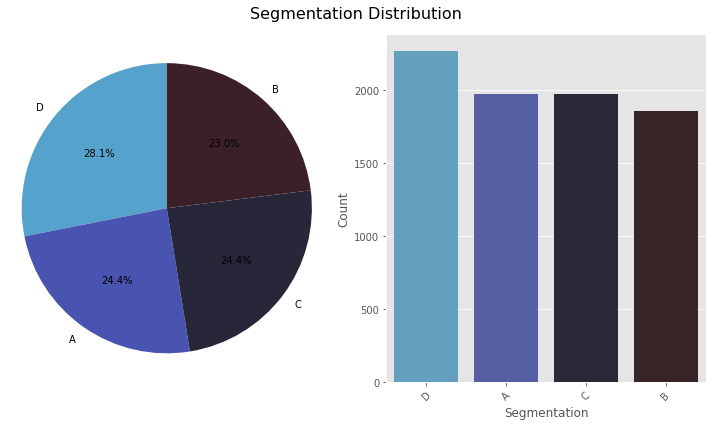

In [15]:
# Categorical Columns
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

# Palet warna kustom
colors = sns.color_palette("icefire")

# Plot pie chart dan bar chart untuk setiap kolom biner
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Tentukan ukuran keseluruhan figur

    # Pie chart
    plt.subplot(1, 2, 1)
    value_counts = data[col].value_counts()
    value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors[:len(value_counts)])
    plt.ylabel('')
    plt.axis('equal')

    # Bar chart
    plt.subplot(1, 2, 2)
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors[:len(value_counts)])
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Judul keseluruhan
    plt.suptitle(f'{col} Distribution' , fontsize=16)

    plt.tight_layout()
    plt.show()


## Numerical Columns

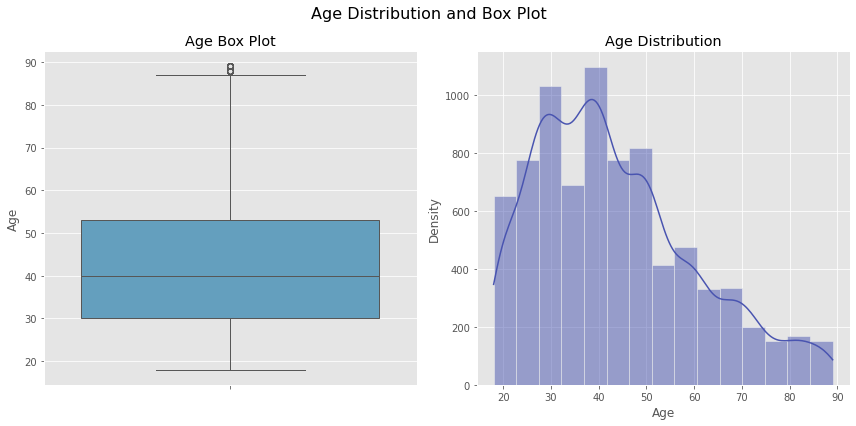

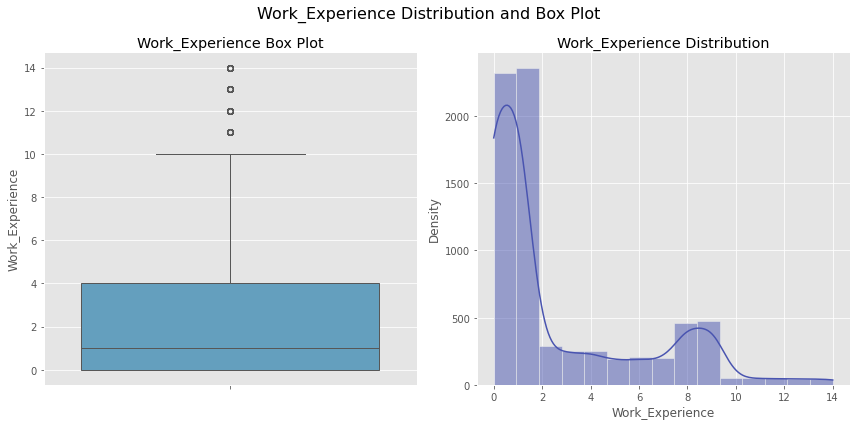

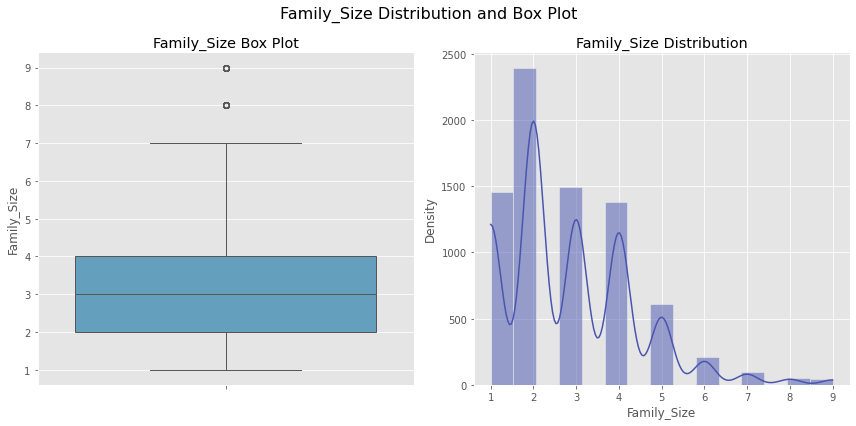

In [16]:
# Define numerical columns
numerical_cols = ['Age', 'Work_Experience', 'Family_Size']

# Custom color palette
colors = sns.color_palette("icefire")

# Plotting box plots and histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 6))  # Set the overall figure size

    # Box plot for numerical column
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[col], color=colors[0])
    plt.title(f'{col} Box Plot')

    # Histogram for numerical column
    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=col, bins=15, kde=True, color=colors[1])
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Density')

    # Overall title
    plt.suptitle(f'{col} Distribution and Box Plot', fontsize=16)

    plt.tight_layout()
    plt.show()


Text(0.5, 1.0, 'Work Experience')

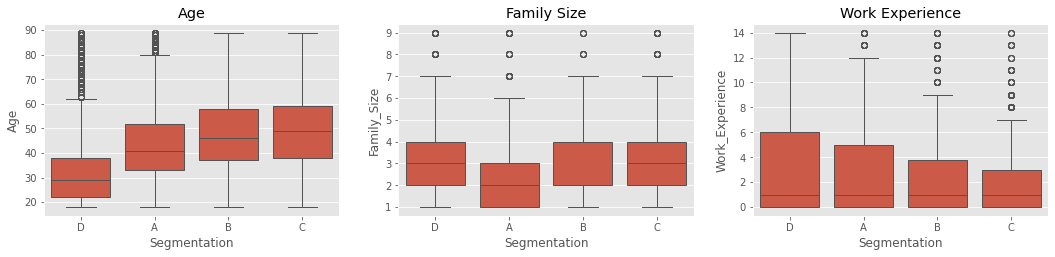

In [17]:
plt.figure(figsize=(18, 12))

# Box plots for Age
plt.subplot(3, 3, 1)
sns.boxplot(x='Segmentation', y='Age', data=data)
plt.title('Age')

# Box plots for Family Size
plt.subplot(3, 3, 2)
sns.boxplot(x='Segmentation', y='Family_Size', data=data)
plt.title('Family Size')

# Box plots for Work Experience
plt.subplot(3, 3, 3)
sns.boxplot(x='Segmentation', y='Work_Experience', data=data)
plt.title('Work Experience')

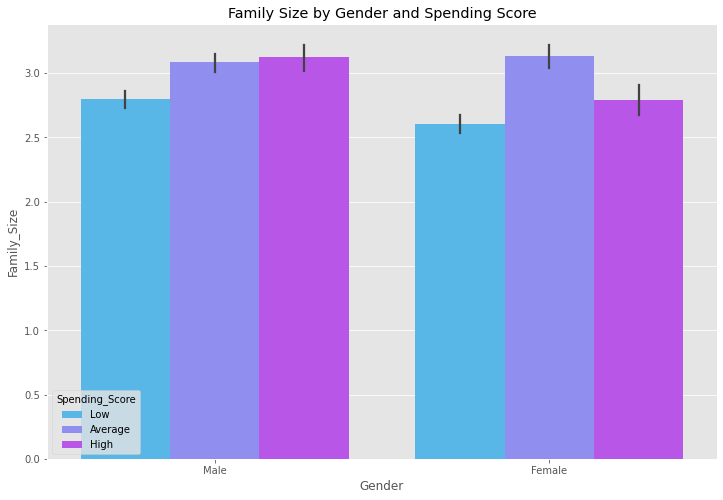

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(
    x='Gender',
    y='Family_Size',
    hue='Spending_Score',
    data=data,
    palette='cool',
    ax=ax
)
ax.set_title('Family Size by Gender and Spending Score')
plt.show()

In [19]:
def category_age(age):
    if age >= 11 and age <= 20:
        return "11-20"
    elif age >= 21 and age <= 30:
        return "21-30"
    elif age >= 31 and age <= 40:
        return "31-40"
    elif age >= 41 and age <= 50:
        return "41-50"
    elif age >= 51 and age <= 60:
        return "51-60"
    elif age >= 61 and age <= 70:
        return "61-70"
    elif age >= 71 and age <= 80:
        return "71-80"
    else:
        return ">80"
# Membuat DataFrame dengan kategori umur
data['Age_Category'] = data['Age'].apply(category_age)

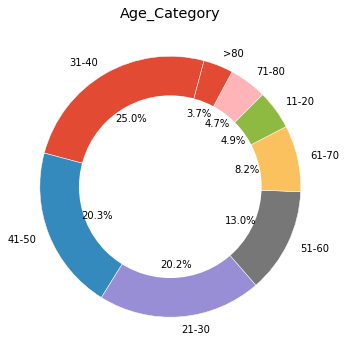

In [20]:
plt.figure(figsize=(8, 6))
education_counts = data['Age_Category'].value_counts()
Age_Category = data['Age_Category'].value_counts()
plt.pie(Age_Category, labels=education_counts.index, autopct='%1.1f%%', startangle=75, wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age_Category')
plt.show()

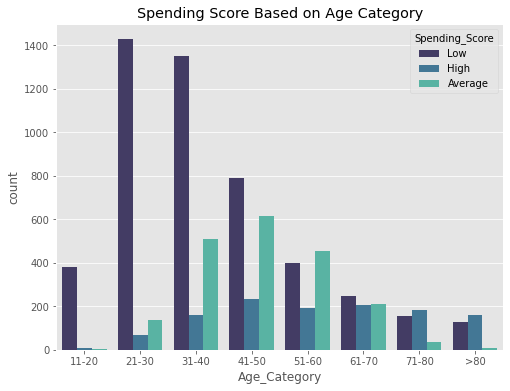

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Category', hue='Spending_Score', data=data.sort_values(by=['Age_Category'], ascending=[True]), palette='mako')
plt.title('Spending Score Based on Age Category')
plt.xlabel('Age_Category')
plt.show()


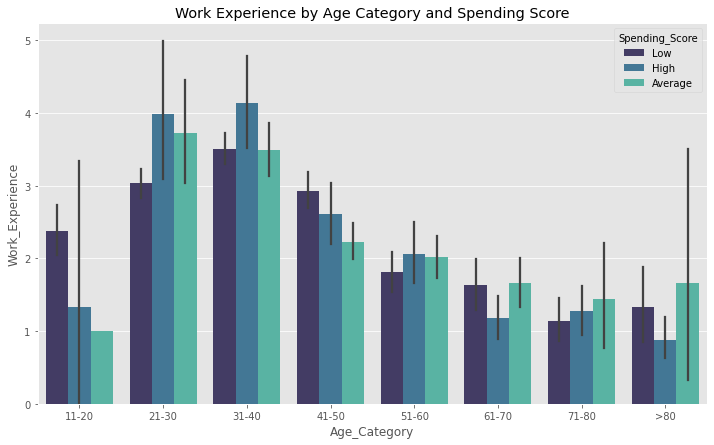

In [22]:
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Age_Category',
    y='Work_Experience',
    hue='Spending_Score',
    data=data.sort_values(by=['Age_Category'], ascending=[True]),
    palette='mako'
)
plt.title('Work Experience by Age Category and Spending Score')
plt.show()

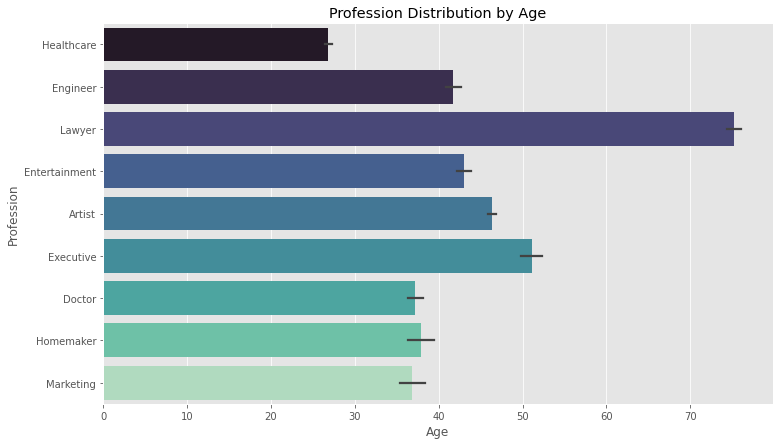

In [23]:
# Profession with Age
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Age',
    y='Profession',
    data=data,
    palette='mako'
);

plt.title('Profession Distribution by Age')
plt.show()

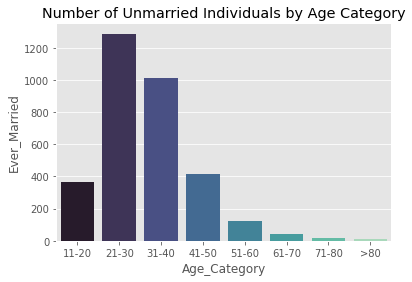

In [24]:
#filter yang belum married
not_married = data.loc[data['Ever_Married'] == 'No']
age_married = not_married.groupby(['Age_Category'])['Ever_Married'].count().reset_index()
age_married.head()

sns.barplot(
    x='Age_Category',
    y='Ever_Married',
    data=age_married.sort_values(by=['Age_Category'], ascending=[True]),
    palette='mako',
);

plt.title('Number of Unmarried Individuals by Age Category')
plt.show()

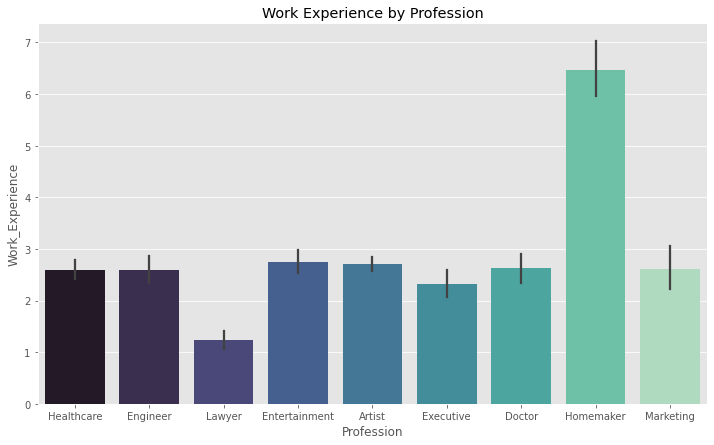

In [25]:
# Profession with Experience
plt.figure(figsize=(12, 7))
sns.barplot(
    y='Work_Experience',
    x='Profession',
    data=data,
    palette='mako'
);

plt.title('Work Experience by Profession')
plt.show()

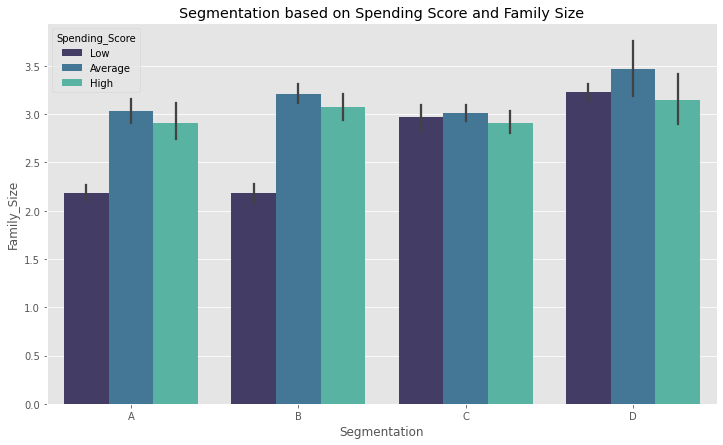

In [26]:
#Segmentation based on spending score and Family size
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Segmentation',
    y='Family_Size',
    hue='Spending_Score',
    data=data.sort_values(by=['Segmentation'], ascending=[True]),
    palette='mako'
);

plt.title('Segmentation based on Spending Score and Family Size')
plt.show()

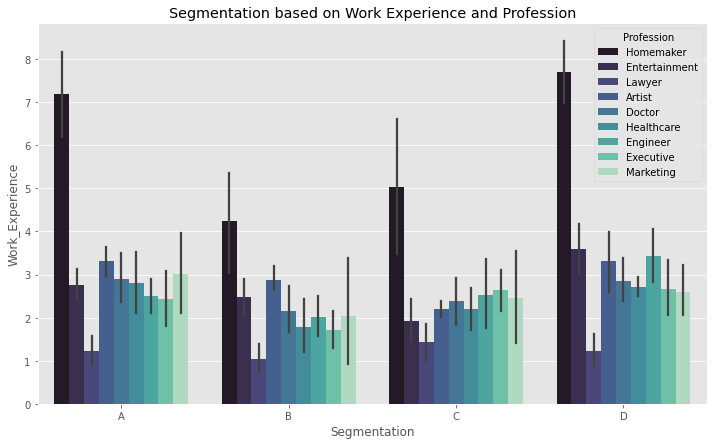

In [27]:
#Segmentation based on work experience and profession
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Segmentation',
    y='Work_Experience',
    hue='Profession',
    data=data.sort_values(by=['Segmentation'], ascending=[True]),
    palette='mako'
);

plt.title('Segmentation based on Work Experience and Profession')
plt.show()


# Data Cleaning

In [28]:
# Data copy
cleaned_data = data.copy()
cleaned_data.drop('Age_Category', axis=1, inplace=True)

In [29]:
# Number of duplicate data
cleaned_data.duplicated().sum()

0

> Tidak ada data yang duplikat

In [30]:
# Number of missing values for each columns
pd.DataFrame(data.isnull().sum(), columns = ["Number of Missing Values"])

,Number of Missing Values
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


> - Terdapat 140 missing values pada `Ever_Married`
> - Terdapat 78 missing values pada `Age`
> - Terdapat 124 missing values pada `Profession`
> - Terdapat 829 missing values pada `Work_Experience`
> - Terdapat 335 missing values pada `Family_Size`
> - Terdapat 76 missing values pada `Var_1`

In [31]:
cleaned_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0000,Low,4.0000,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0000,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0000,Low,1.0000,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0000,High,2.0000,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0000,Cat_6,A


In [32]:
def data_cleaning(data):
    # Fill missing values in 'Ever_Married' by mode within each age group
    for idx, row in data.iterrows():
        if pd.isna(row['Ever_Married']):
            age = row['Age']
            mode_value = data.loc[data.Age == age, 'Ever_Married'].mode().iloc[0]
            data.at[idx, 'Ever_Married'] = mode_value

    # Fill missing values in 'Graduated' by mode within each age group
    for idx, row in data.iterrows():
        if pd.isna(row['Graduated']):
            age = row['Age']
            mode_value = data.loc[data.Age == age, 'Graduated'].mode().iloc[0]
            data.at[idx, 'Graduated'] = mode_value
    
    # Fill missing values in 'Work_Experience' by mode within each age group
    for idx, row in data.iterrows():
        if pd.isna(row['Work_Experience']):
            age = row['Age']
            mode_value = data.loc[data.Age == age, 'Work_Experience'].mode().iloc[0]
            data.at[idx, 'Work_Experience'] = mode_value
    
    # Replace missing values in 'Family_Size' column with the median of Family Size
    data['Family_Size'].fillna(data['Family_Size'].median(), inplace=True)

    # Replace missing values in 'Profession' column with 'Unknown'
    data['Profession'].fillna('Unknown', inplace=True)

    # Replace missing values in 'Var_1' column with 'Unknown'
    data['Var_1'].fillna('Unknown', inplace=True)


    data['Family_Size'] = data['Family_Size'].astype(int)
    data['Work_Experience'] = data['Work_Experience'].astype(int)

    return data

In [33]:
cleaned_data = data_cleaning(cleaned_data)
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   int64 
 1   Gender           8068 non-null   object
 2   Ever_Married     8068 non-null   object
 3   Age              8068 non-null   int64 
 4   Graduated        8068 non-null   object
 5   Profession       8068 non-null   object
 6   Work_Experience  8068 non-null   int32 
 7   Spending_Score   8068 non-null   object
 8   Family_Size      8068 non-null   int32 
 9   Var_1            8068 non-null   object
 10  Segmentation     8068 non-null   object
dtypes: int32(2), int64(2), object(7)
memory usage: 630.4+ KB


In [34]:
cleaned_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0,Average,3,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1,High,6,Cat_6,A


https://www.kaggle.com/code/fabrciomacena/customer-segmentation-unsupervised-learning#notebook-container

# Data Preprocessing

In [35]:
preprocessed_data = cleaned_data.copy()
preprocessed_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0,Average,3,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1,High,6,Cat_6,A


In [36]:
def data_preprocessing(data):
    le=LabelEncoder()
    for col in data.columns:
        if data[col].dtype.name == 'object' or data[col].dtype.name == 'category':
            data[col] = le.fit_transform(data[col])
    data.drop('ID', axis = 1, inplace = True)
    return data

In [37]:
preprocessed_data = data_preprocessing(preprocessed_data)
preprocessed_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,0,0,3,3,0
2,0,1,67,1,2,1,2,1,5,1
3,1,1,67,1,7,0,1,2,5,1
4,0,1,40,1,3,1,1,6,5,0


In [39]:
cleaned_data['Segmentation'].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

In [40]:
preprocessed_data['Segmentation'].value_counts()

Segmentation
3    2268
0    1972
2    1970
1    1858
Name: count, dtype: int64

In [41]:
for col in preprocessed_data.columns:
    print(preprocessed_data[col].value_counts())

Gender
1    4417
0    3651
Name: count, dtype: int64
Ever_Married
1    4725
0    3343
Name: count, dtype: int64
Age
35    250
37    234
33    232
42    232
40    229
27    229
43    226
38    221
32    221
28    220
25    218
31    214
36    209
39    208
41    206
26    200
30    196
29    183
50    180
47    167
51    161
46    160
45    158
53    158
52    157
49    155
48    154
22    142
19    134
18    132
23    129
20    127
21    116
56    110
55     98
59     97
60     95
57     93
61     93
62     85
58     80
63     80
66     72
65     72
70     71
68     69
72     67
69     67
67     55
73     54
71     49
81     42
82     36
89     36
88     35
83     35
79     34
84     33
75     32
77     30
86     30
74     30
78     29
87     28
76     27
80     24
85     22
Name: count, dtype: int64
Graduated
1    5026
0    3042
Name: count, dtype: int64
Profession
0    2516
5    1332
3     949
2     699
1     688
7     623
4     599
8     292
6     246
9     124
Name: count, dtype: i

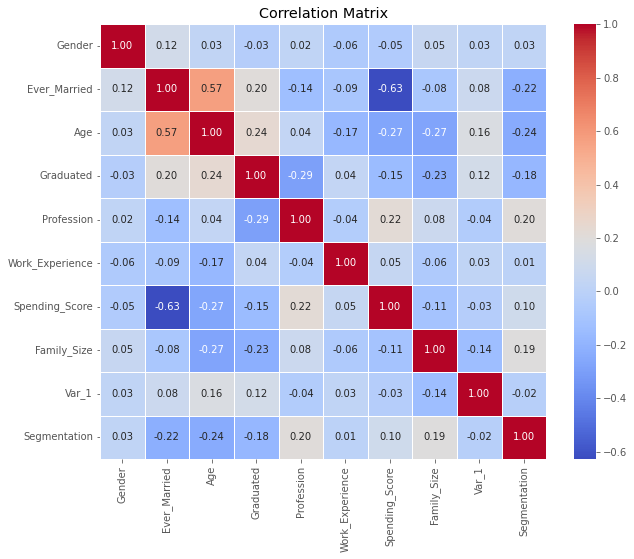

In [42]:
# Correlation Matrix
correlation_matrix = preprocessed_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

+ Profession, Family_Size, Spending_Score
- Age, Ever_Married, Graduated

Neutral Gender, Work_Experience, Var_1

# Modelling

In [50]:
data_train = preprocessed_data.copy()

X = data_train.drop('Segmentation', axis = 1)
y = data_train['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1,2,4,3
1,0,1,38,1,2,0,0,3,3
2,0,1,67,1,2,1,2,1,5
3,1,1,67,1,7,0,1,2,5
4,0,1,40,1,3,1,1,6,5


In [52]:
def data_training(X_train, X_test, y_train, y_test):

    # Define models
    models = [('LOGR', LogisticRegression()),
              ('KNN', KNeighborsClassifier()),
              ('CART', DecisionTreeClassifier()),
              ('RF', RandomForestClassifier()),
              ('GBM', GradientBoostingClassifier()),
              ('XGBoost', XGBClassifier())]
             
    # Define columns for the result DataFrame
    res_cols = ["model", "accuracy_score",
                "0_precision", "0_recall", "0_f1-score",
                "1_precision", "1_recall", "1_f1-score",
                "2_precision", "2_recall", "2_f1-score",
                "3_precision", "3_recall", "3_f1-score"]
    df_result = pd.DataFrame(columns=res_cols)

    # Iterate through each model
    for name, model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        # Calculate classification report
        class_report = classification_report(y_test, y_pred, digits=4, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']
        two_report = class_report['2']
        three_report = class_report['3']

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        # Store the results in the DataFrame
        idx_res_values = [name, accuracy,
                          zero_report['precision'], zero_report['recall'], zero_report['f1-score'],
                          one_report['precision'], one_report['recall'], one_report['f1-score'],
                          two_report['precision'], two_report['recall'], two_report['f1-score'],
                          three_report['precision'], three_report['recall'], three_report['f1-score']]

        df_result.loc[len(df_result)] = idx_res_values

    # Sort the DataFrame by accuracy score
    df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)

    return df_result

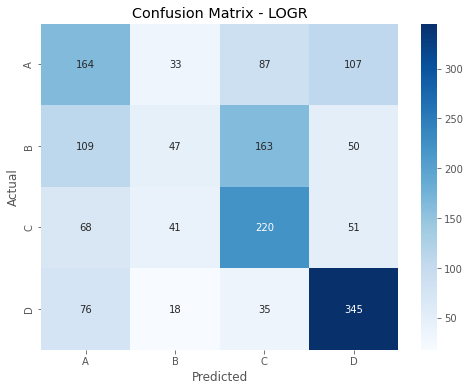

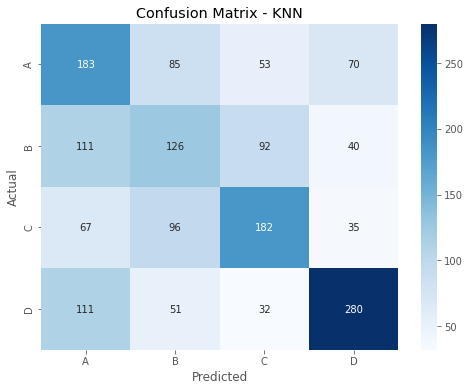

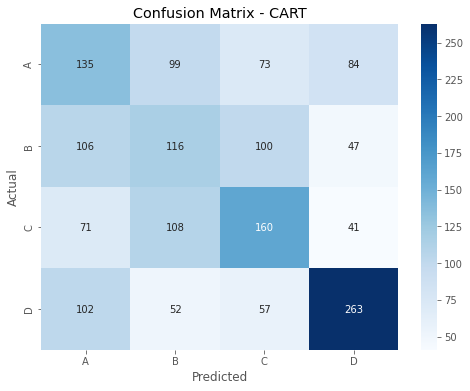

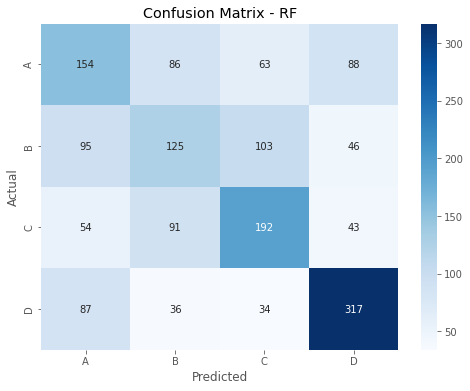

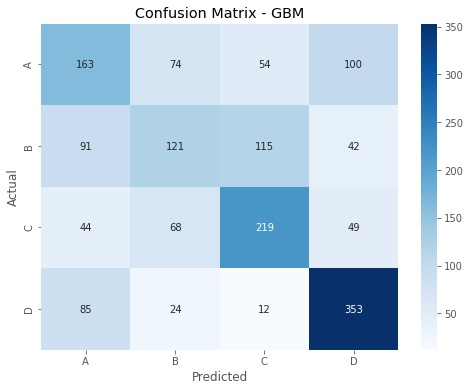

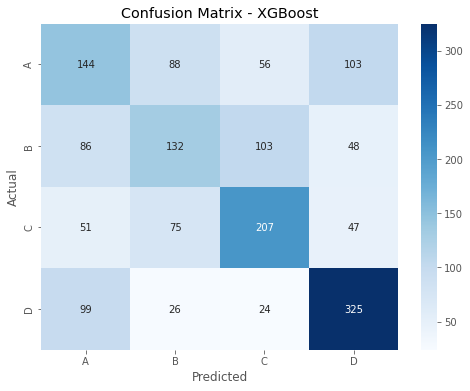

,model,accuracy_score,0_precision,0_recall,0_f1-score,1_precision,1_recall,1_f1-score,2_precision,2_recall,2_f1-score,3_precision,3_recall,3_f1-score
0,GBM,0.5304,0.4256,0.4169,0.4212,0.4216,0.3279,0.3689,0.5475,0.5763,0.5615,0.6489,0.7447,0.6935
1,XGBoost,0.5006,0.3789,0.3683,0.3735,0.4112,0.3577,0.3826,0.5308,0.5447,0.5377,0.6214,0.6857,0.6520
2,RF,0.4882,0.3949,0.3939,0.3944,0.3698,0.3388,0.3536,0.4898,0.5053,0.4974,0.6417,0.6688,0.6550
3,LOGR,0.4808,0.3933,0.4194,0.4059,0.3381,0.1274,0.1850,0.4356,0.5789,0.4972,0.6239,0.7278,0.6719
4,KNN,0.4777,0.3877,0.4680,0.4241,0.3520,0.3415,0.3466,0.5070,0.4789,0.4926,0.6588,0.5907,0.6229
5,CART,0.4176,0.3261,0.3453,0.3354,0.3093,0.3144,0.3118,0.4103,0.4211,0.4156,0.6046,0.5549,0.5787


In [53]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display results
data_training(X_train_scaled, X_test_scaled, y_train, y_test)

# Hyperparameter Tuning

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Gradient Boosting Machine: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


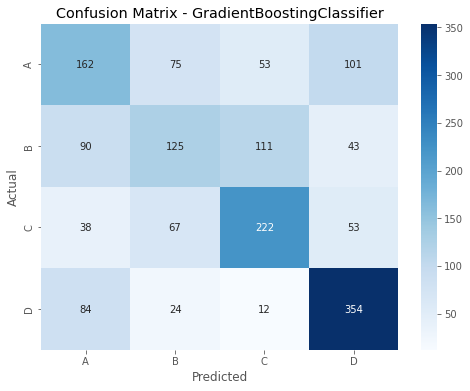

Cross-Validation Accuracy for Gradient Boosting Machine: 0.5345 ± 0.0161
Accuracy for Gradient Boosting Machine: 0.5347
Classification Report for Gradient Boosting Machine:
{'0': {'precision': 0.43315508021390375, 'recall': 0.4143222506393862, 'f1-score': 0.4235294117647059, 'support': 391.0}, '1': {'precision': 0.42955326460481097, 'recall': 0.33875338753387535, 'f1-score': 0.3787878787878788, 'support': 369.0}, '2': {'precision': 0.5577889447236181, 'recall': 0.5842105263157895, 'f1-score': 0.570694087403599, 'support': 380.0}, '3': {'precision': 0.6424682395644283, 'recall': 0.7468354430379747, 'f1-score': 0.6907317073170731, 'support': 474.0}, 'accuracy': 0.5346964064436184, 'macro avg': {'precision': 0.5157413822766903, 'recall': 0.5210304018817564, 'f1-score': 0.5159357713183141, 'support': 1614.0}, 'weighted avg': {'precision': 0.5231465523861992, 'recall': 0.5346964064436184, 'f1-score': 0.5264208858453455, 'support': 1614.0}}


In [54]:
def tune_model(X_train, y_train, model, param_grid, cv=5):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.show()
    
    return accuracy, report

def cross_val_evaluate(model, X_train, y_train, cv=5):
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Define parameter grids
param_grid_gbm = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Tune and evaluate Gradient Boosting Machine
best_gbm, best_params_gbm = tune_model(X_train_scaled, y_train, GradientBoostingClassifier(), param_grid_gbm)
print("Best parameters for Gradient Boosting Machine:", best_params_gbm)
accuracy_gbm, report_gbm = evaluate_model(best_gbm, X_test_scaled, y_test)
cv_mean_gbm, cv_std_gbm = cross_val_evaluate(best_gbm, X_train_scaled, y_train)
print(f"Cross-Validation Accuracy for Gradient Boosting Machine: {cv_mean_gbm:.4f} ± {cv_std_gbm:.4f}")
print(f"Accuracy for Gradient Boosting Machine: {accuracy_gbm:.4f}")
print("Classification Report for Gradient Boosting Machine:")
print(report_gbm)

In [55]:
'''
# Tune and evaluate CatBoost Classifier
best_catboost, best_params_catboost = tune_model(X_train_scaled, y_train, CatBoostClassifier(verbose=0), param_grid_catboost)
print("Best parameters for CatBoost Classifier:", best_params_catboost)
accuracy_catboost, report_catboost = evaluate_model(best_catboost, X_test_scaled, y_test)
cv_mean_catboost, cv_std_catboost = cross_val_evaluate(best_catboost, X_train_scaled, y_train)
print(f"Cross-Validation Accuracy for CatBoost Classifier: {cv_mean_catboost:.4f} ± {cv_std_catboost:.4f}")
print(f"Accuracy for CatBoost Classifier: {accuracy_catboost:.4f}")
print("Classification Report for CatBoost Classifier:")
print(report_catboost)

# Tune and evaluate AdaBoost Classifier
best_adaboost, best_params_adaboost = tune_model(X_train_scaled, y_train, AdaBoostClassifier(), param_grid_adaboost)
print("Best parameters for AdaBoost Classifier:", best_params_adaboost)
accuracy_adaboost, report_adaboost = evaluate_model(best_adaboost, X_test_scaled, y_test)
cv_mean_adaboost, cv_std_adaboost = cross_val_evaluate(best_adaboost, X_train_scaled, y_train)
print(f"Cross-Validation Accuracy for AdaBoost Classifier: {cv_mean_adaboost:.4f} ± {cv_std_adaboost:.4f}")
print(f"Accuracy for AdaBoost Classifier: {accuracy_adaboost:.4f}")
print("Classification Report for AdaBoost Classifier:")
print(report_adaboost)
'''

'\n# Tune and evaluate CatBoost Classifier\nbest_catboost, best_params_catboost = tune_model(X_train_scaled, y_train, CatBoostClassifier(verbose=0), param_grid_catboost)\nprint("Best parameters for CatBoost Classifier:", best_params_catboost)\naccuracy_catboost, report_catboost = evaluate_model(best_catboost, X_test_scaled, y_test)\ncv_mean_catboost, cv_std_catboost = cross_val_evaluate(best_catboost, X_train_scaled, y_train)\nprint(f"Cross-Validation Accuracy for CatBoost Classifier: {cv_mean_catboost:.4f} ± {cv_std_catboost:.4f}")\nprint(f"Accuracy for CatBoost Classifier: {accuracy_catboost:.4f}")\nprint("Classification Report for CatBoost Classifier:")\nprint(report_catboost)\n\n# Tune and evaluate AdaBoost Classifier\nbest_adaboost, best_params_adaboost = tune_model(X_train_scaled, y_train, AdaBoostClassifier(), param_grid_adaboost)\nprint("Best parameters for AdaBoost Classifier:", best_params_adaboost)\naccuracy_adaboost, report_adaboost = evaluate_model(best_adaboost, X_test_sc

# Testing with Data Test

In [56]:
data_test = pd.read_csv("Test.csv")

In [57]:
data_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0000,Low,1.0000,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0000,Average,4.0000,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0000,Low,1.0000,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0000,High,2.0000,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0000,Cat_6,A


In [58]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [59]:
data_test = data_cleaning(data_test)
data_test = data_preprocessing(data_test)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2627 non-null   int32
 1   Ever_Married     2627 non-null   int32
 2   Age              2627 non-null   int64
 3   Graduated        2627 non-null   int32
 4   Profession       2627 non-null   int32
 5   Work_Experience  2627 non-null   int32
 6   Spending_Score   2627 non-null   int32
 7   Family_Size      2627 non-null   int32
 8   Var_1            2627 non-null   int32
 9   Segmentation     2627 non-null   int32
dtypes: int32(9), int64(1)
memory usage: 113.0 KB


              precision    recall  f1-score   support

           0       0.35      0.28      0.31       846
           1       0.25      0.22      0.23       550
           2       0.26      0.34      0.30       472
           3       0.42      0.47      0.44       759

    accuracy                           0.33      2627
   macro avg       0.32      0.33      0.32      2627
weighted avg       0.33      0.33      0.33      2627



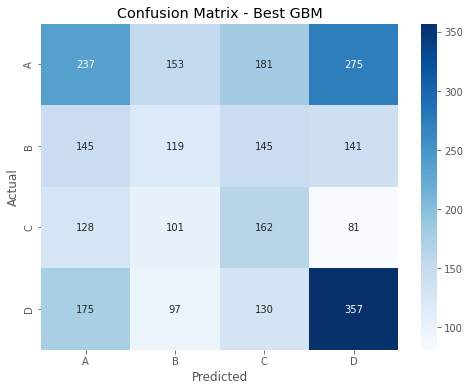

In [60]:
X = data_test.drop('Segmentation', axis = 1)
y = data_test['Segmentation']

X_scaled = scaler.transform(X)
predictions = best_gbm.predict(X_scaled)
print(classification_report(y, predictions))

cm = confusion_matrix(y, predictions)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best GBM')
plt.show()

# Model Deployment

In [94]:
import pickle

# Save the model to a file using pickle
filename = 'gbm_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_gbm, file)

In [61]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ditya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
